# 2.1. Problem Statement: Numpy

## Problem Statement 1

### Write a function so that the columns of the output matrix are powers of the input vector.

### The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.

### HINT: Such a matrix with a geometric progression in each row is named for Alexandre-Theophile Vandermonde.

In [1]:
import numpy as np
# Use of the function column_stack
# column_stack = Stack 1-D arrays as columns into a 2-D array

# First I define the function with 2 parameters : My NumPy List and the Power to use in each element
def functVander(myList, power):
    return np.column_stack([myList**(power-1-i) for i in range (power)])

# Test The function
# For this I first initialize my 2 parameters
listtest = np.array([1, 2, 3, 4])
P = 5

# And I call my Function with the 2 parameters
functVander(listtest, P)

array([[  1,   1,   1,   1,   1],
       [ 16,   8,   4,   2,   1],
       [ 81,  27,   9,   3,   1],
       [256,  64,  16,   4,   1]])

## Problem Statement 2

### Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows:
### The moving average sequence has n-k+1 elements as shown below.
### The moving averages with k=4 of a ten-value sequence (n=10) is shown below

In [2]:
# values = [4, 6, 12]
# total  = 0
# sums   = []

# for v in values:
#   total = total + v
#   sums.append(total)

# print ('Values: ', values)
# print ('Sums:   ', sums)

import numpy as np
# Given a sequence of n value in a list 
# Here the sesequence is [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]


# window size k>0, the k-th moving average = step of deplacement in the list a
# n-k+1=10-4+1=7

def moving_average(a, n=3) :
    ret = a.cumsum(axis=0)
    ret[n:] = ret[n:] - ret[:-n]
    return len(ret[n - 1:] / n)
        
# a = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# move_average(a,4) 

a = np.array([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150])
print("the moving average sequence is :",moving_average(a,3))

the moving average sequence is : 11


# 2.2. Problem Statement: Pandas

## Problem Statement 1

### 1) How-to-count-distance-to-the-previous-zero
### For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position
### Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
### The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.

In [3]:
import pandas as pd

df = pd.DataFrame({'X':[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
a = list(df.X)
# print(a)
y = []
i = 0

for el in a:
    if el != 0:
        i+=1
    else:
        i = 0
    y.append(i) 
y
df['Y'] = y
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


### 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [4]:
import pandas as pd
import numpy as np

# 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.
indexdata = pd.date_range('2015-01-01','2015-12-31',freq='B')
df = pd.DataFrame({'Value':np.random.randint(1,100,len(indexdata)).tolist()},index=indexdata)
print('\nTop 5 records from DataFrame\n','-'*30)
print(df.head())


# 3) Find the sum of the values in s for every Wednesday
print('\nSum of value of wednesday: ', df[df.index.weekday==2].sum())


# 4) Average For each calendar month
print(df.resample('M').mean())

# 5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.
df = df.groupby(pd.Grouper(freq='4M'))
print(df.idxmax())

print('\n Printing groups with value:\n','-'*50)
for name,grp in df:
    print('Group name: ',name)
    print(grp.to_string())


Top 5 records from DataFrame
 ------------------------------
            Value
2015-01-01     63
2015-01-02     57
2015-01-05     46
2015-01-06     30
2015-01-07     78

Sum of value of wednesday:  Value    2684
dtype: int64
                Value
2015-01-31  47.636364
2015-02-28  55.550000
2015-03-31  56.363636
2015-04-30  46.454545
2015-05-31  52.904762
2015-06-30  38.363636
2015-07-31  51.521739
2015-08-31  52.571429
2015-09-30  52.181818
2015-10-31  56.500000
2015-11-30  51.857143
2015-12-31  45.608696
                Value
2015-01-31 2015-01-26
2015-05-31 2015-02-17
2015-09-30 2015-06-03
2016-01-31 2015-12-09

 Printing groups with value:
 --------------------------------------------------
Group name:  2015-01-31 00:00:00
            Value
2015-01-01     63
2015-01-02     57
2015-01-05     46
2015-01-06     30
2015-01-07     78
2015-01-08      9
2015-01-09     18
2015-01-12     18
2015-01-13     39
2015-01-14     81
2015-01-15      7
2015-01-16     64
2015-01-19     63
2015-01-20 

## Problem Statement 2

In [5]:
# Read the dataset from the below link
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
# read data into a DataFrame
data = pd.read_csv('US_Baby_Names_right.csv', index_col=0)
print(data.head())

          Id     Name  Year Gender State  Count
11349  11350     Emma  2004      F    AK     62
11350  11351  Madison  2004      F    AK     48
11351  11352   Hannah  2004      F    AK     46
11352  11353    Grace  2004      F    AK     44
11353  11354    Emily  2004      F    AK     41


/Volumes/mobile_web/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### 1) Delete unnamed columns

In [6]:
data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [7]:
# data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1,inplace = True)
df = data.loc[:, ~data.columns.str.contains('^unnamed')]
print(df.head())

          Id     Name  Year Gender State  Count
11349  11350     Emma  2004      F    AK     62
11350  11351  Madison  2004      F    AK     48
11351  11352   Hannah  2004      F    AK     46
11352  11353    Grace  2004      F    AK     44
11353  11354    Emily  2004      F    AK     41


### 2) Show the distribution of male and female

In [8]:
data.groupby('Gender')['Gender'].count()

Gender
F    558846
M    457549
Name: Gender, dtype: int64

### 3) Show the top 5 most preferred names

In [9]:
df_name_count = data.groupby('Name')['Name'].count()
df_name_count.sort_values(ascending=False).head()

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

### 4) What is the median name occurrence in the dataset

In [10]:
data.median()['Id']
data[data['Id'] == data.median()['Id']]['Name']
data.groupby('Name')['Name','Count'].median()

,Count
Name,
Aaban,6.0
Aadan,5.5
Aadarsh,5.0
Aaden,10.0
Aadhav,6.0
Aadhya,8.0
Aadi,7.0
Aadin,5.0
Aadit,6.0


### 5) Distribution of male and female born count by states

In [11]:
data.groupby(['State','Year','Gender'])['Gender'].count()

State  Year  Gender
AK     2004  F         204
             M         206
       2005  F         214
             M         216
       2006  F         221
             M         217
       2007  F         199
             M         227
       2008  F         225
             M         237
       2009  F         212
             M         237
       2010  F         222
             M         240
       2011  F         235
             M         240
       2012  F         216
             M         252
       2013  F         225
             M         255
       2014  F         231
             M         260
AL     2004  F         834
             M         711
       2005  F         847
             M         719
       2006  F         899
             M         757
       2007  F         942
             M         771
                      ... 
WV     2011  F         403
             M         342
       2012  F         399
             M         352
       2013  F         406
        

# 2.3. Problem Statement: Use Cases on Numpy and Pandas

### 1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as:

In [12]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print("------------------")
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.
------------------
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.
------------------
The entry is 2
The reciprocal of 2 is 0.5


### 2) Array out of Bound Exception
### Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except)

In [13]:
#import numpy 
import numpy as np

# I define a numpy list
liste1 = np.array([1,2,3,4,5,6,7])

#  I loop in a range that don't have the same lenght than liste1
for i in range(10):
    try:
        print('List value :' +str(liste1[i]))
    except:
        print("Oops! Array out of Bound Exception occured.")

List value :1
List value :2
List value :3
List value :4
List value :5
List value :6
List value :7
Oops! Array out of Bound Exception occured.
Oops! Array out of Bound Exception occured.
Oops! Array out of Bound Exception occured.


### 3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py

In [14]:
# Importing the custom module fibo
import fibo

fibo.fib2()

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

### 4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py

In [15]:
# Importing the custom module palindrome
import palindrome

print("MATAM is a palindrome", palindrome.isPalindrome('MATAM'))
print("DAKAR is a palindrome", palindrome.isPalindrome('DAKAR'))

MATAM is a palindrome True
DAKAR is a palindrome False


### 5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [16]:
import numpy as np
numkey = np.random.randint(51)
cipher="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789!@#$%^&*()_+"

class Cipher():
    
    def __init__(self):#,mystr='xyz'):
        self.mystr=input("Enter a String: ")
        
        
    def encrypt(self,mystr):
        global cipher
        global numkey
        self.mystr=self.mystr
        encstring=''

        for i,n in enumerate(self.mystr):
            encstring=cipher[62:65]+encstring+self.mystr[i]+str(numkey)+cipher[52:62:3]
        return (encstring)
    
    def decrypt(self,abc):
        text=''.join(list(filter(lambda x: x.isalpha(),abc)))
        return text

In [17]:
toCript = Cipher()
print("Cript user enter: ", toCript.encrypt(toCript))
print("Decript user enter: ", toCript.decrypt(toCript.encrypt(toCript)))

Enter a String: tamsir
Cript user enter:  !@#!@#!@#!@#!@#!@#t30369a30369m30369s30369i30369r30369
Decript user enter:  tamsir


### 6) Get Data from the following link

In [18]:
#### Get Data from the following link: http://files.grouplens.org/datasets/movielens/ml-20m.zip
#### We will be using the following files for this exercise:
    # ratings.csv : userId,movieId,rating, timestamp
    # tags.csv : userId,movieId, tag, timestamp
    # movies.csv : movieId, title, genres
    
# I. Read the dataset using pandas
ratings = pd.read_csv("ml-20m/ratings.csv")
tags = pd.read_csv("ml-20m/tags.csv")
movies = pd.read_csv("ml-20m/movies.csv")

# II. Extract the first row from tags and print its type.
tagsFirstRow = tags.iloc[0]
print(type(tagsFirstRow))
print("-------------------- END II ------------------")

# III. Extract row 0, 11, 2000 from tags DataFrame
print(tags.iloc[[0,11,2000]])
print("-------------------- END III ------------------")

# IV. Print index, columns of the DataFrame
print(ratings.index.values)
print(ratings.columns.values)
print(tags.index.values)
print(tags.columns.values)
print(movies.index.values)
print(movies.columns.values)
print("-------------------- END IV ------------------")

# V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe()
print("count\t"+str(ratings.rating.count()))
print("mean\t"+str(ratings.rating.mean()))
print("std\t"+str(ratings.rating.std()))
print("min\t"+str(ratings.rating.min()))
print("25%\t"+str(ratings.rating.quantile(0.25)))
print("50%\t"+str(ratings.rating.quantile(0.5)))
print("75%\t"+str(ratings.rating.quantile(0.75)))
print("max\t"+str(ratings.rating.max()))
print(ratings.rating.describe())
print("-------------------- END V ------------------")

# VI. Filter out ratings with rating > 5
rating_5 = ratings[ratings.rating>5]
#rating_5 = ratings[ratings.rating<5]
print("Filter out ratings with rating > 5", rating_5)
print("-------------------- END VI ------------------")


# VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.    
print("ratings has null: "+str(ratings.isnull().any().any()))
print("tags has null: " +str(tags.isnull().any().any()))
print("movies has null: " +str(movies.isnull().any().any()))
    #Removing null rows
oldCount = tags.movieId.count()
noOfNullRows = tags[tags.tag.isnull()].movieId.count()
tags.dropna(inplace=True)
newCount = tags.movieId.count()
    #Check if the correct count has been removed
print("Old Count: " + str(oldCount))
print("New Count: " + str(newCount))
print("Null Count: " + str(noOfNullRows))
print("Number of Null count matches with old count - new count? : " + str(noOfNullRows ==(oldCount-newCount)))
print("-------------------- END VII ------------------")

# VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.
movies_animation = movies[movies['genres']=="Animation"]
print("Movies animation ", movies_animation)
print("-------------------- END VIII ------------------")

# IX. Find the average rating of movies
print(ratings.groupby("movieId")["rating"].agg(np.mean))
print("-------------------- END IX ------------------")

# X. Perform an inner join of movies and tags based on movieId.
result=pd.merge(movies,tags,on="movieId")
print(result)
print("-------------------- END X ------------------")

# XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4
movies_ratings = pd.merge(movies,ratings,on="movieId")
comedy_4 = movies_ratings[(movies_ratings["genres"].str.contains("Comedy")) & (movies_ratings["rating"] > 4)].groupby("movieId")
comedy_4.head(5)
print("-------------------- END XI ------------------")

# XII. Split 'genres' into multiple columns
genre = pd.concat([movies.drop(["genres"],axis=1),pd.DataFrame(movies["genres"].str.split("|").tolist()).apply(pd.Series).rename(columns={0:"genre_0",1:"genre_1",2:"genre_2",3:"genre_3",4:"genre_4",5:"genre_5",6:"genre_6",7:"genre_7",8:"genre_8",9:"genre_9"})],axis=1)
genre.head()
print("-------------------- END XII ------------------")

# XIII. Extract year from title e.g. (1995).
y1 = movies['title'].str.extract('(\(\d{4}\))',expand=True)
y2 = movies['title'].str.extract('(\d{4})',expand=True)
print(y1)
print(y2)
print("-------------------- END XIII ------------------")

# XIV. Select rows based on timestamps later than 2015-02-01
t = pd.concat([tags.drop(["timestamp"],axis=1),pd.to_datetime(tags['timestamp'], unit='s')],axis=1)
t1 = t[t['timestamp'] > '2015-02-01']
print(t1)
print("-------------------- END XIV ------------------")

# XV. Sort the tags DataFrame based on timestamp
tag_sorted = tags.sort_values("timestamp")
print(tag_sorted)
print("-------------------- END XV ------------------")

<class 'pandas.core.series.Series'>
-------------------- END II ------------------
      userId  movieId                tag   timestamp
0         18     4141        Mark Waters  1240597180
11        65     1783      noir thriller  1368149983
2000     910    68554  conspiracy theory  1368043943
-------------------- END III ------------------
[       0        1        2 ... 20000260 20000261 20000262]
['userId' 'movieId' 'rating' 'timestamp']
[     0      1      2 ... 465561 465562 465563]
['userId' 'movieId' 'tag' 'timestamp']
[    0     1     2 ... 27275 27276 27277]
['movieId' 'title' 'genres']
-------------------- END IV ------------------
count	20000263
mean	3.5255285642993797
std	1.051988919275684
min	0.5
25%	3.0
50%	3.5
75%	4.0
max	5.0
count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
-------------------- END V -----------------

-------------------- END XI ------------------
-------------------- END XII ------------------
            0
0      (1995)
1      (1995)
2      (1995)
3      (1995)
4      (1995)
5      (1995)
6      (1995)
7      (1995)
8      (1995)
9      (1995)
10     (1995)
11     (1995)
12     (1995)
13     (1995)
14     (1995)
15     (1995)
16     (1995)
17     (1995)
18     (1995)
19     (1995)
20     (1995)
21     (1995)
22     (1995)
23     (1995)
24     (1995)
25     (1995)
26     (1995)
27     (1995)
28     (1995)
29     (1995)
...       ...
27248  (1999)
27249  (2011)
27250  (2006)
27251  (1966)
27252  (1999)
27253  (2002)
27254  (1991)
27255  (2009)
27256  (2014)
27257  (2011)
27258  (2009)
27259  (2014)
27260  (2015)
27261  (2013)
27262  (2014)
27263  (2014)
27264  (2015)
27265  (2014)
27266  (2010)
27267  (2011)
27268  (2000)
27269  (2003)
27270  (2006)
27271  (2000)
27272  (2001)
27273  (2007)
27274  (2002)
27275  (2014)
27276  (2001)
27277  (2014)

[27278 rows x 1 columns]
          0

# 2.4. Problem Statement: Matplotlib

### 1. Create a pie chart presenting the male/female proportion

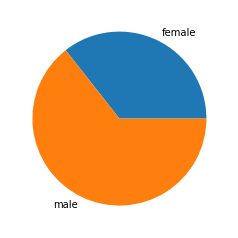

In [19]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
sums = titanic.groupby("sex").pclass.count()
plt.pie(sums, labels=sums.index)
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

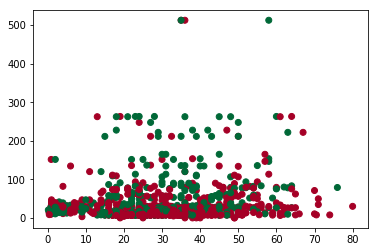

In [20]:
plt.scatter(titanic['age'],titanic['fare'], c=titanic["sex"].map({'male':0,'female':1}), cmap="RdYlGn")

# 2.5. Problem Statement: Data Cleaning

In [21]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays':  [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column)

In [22]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [23]:
df1 = pd.DataFrame(df.From_To.str.split('_',1).tolist(),columns = ['From','To'])
df1

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [24]:
df1['From'] = df1['From'].str.capitalize()
df1['To'] = df1['To'].str.capitalize()
df1

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [25]:
df.drop('From_To', axis=1, inplace=True)
df = pd.concat([df,df1],axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

### Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [26]:
df_ex = pd.DataFrame(df.RecentDelays.values.tolist(), df.index).add_prefix('delay_')
df_ex

,delay_0,delay_1,delay_2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [27]:
df.drop('RecentDelays', axis=1, inplace=True)
df = pd.concat([df, df_ex],axis=1)
df

,FlightNumber,Airline,From,To,delay_0,delay_1,delay_2
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


# 2.6. Problem Statement: Pandas SQL

## Problem statement 1

### 1. Select 10 records from the adult sqladb

In [28]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
adult_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None,names=col_names,index_col=False)
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


### 2. Show me the average hours per week of all men who are working in private sector

In [29]:
adult_data[adult_data["workclass"]==" Private"].groupby("workclass")["hours-per-week"].mean()

workclass
 Private    40.267096
Name: hours-per-week, dtype: float64

### 3. Show me the frequency table for education, occupation and relationship, separately

In [30]:
pd.crosstab(index=adult_data["education"],columns="count")

col_0,count
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


### 4. Are there any people who are married, working in private sector and having a master’s degree

In [31]:
adult_data[(adult_data["marital-status"].str.startswith(" Married")) & (adult_data["workclass"]==" Private") & (adult_data["education"]==" Masters")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
188,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States
198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States
311,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan
361,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
405,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States
435,33,Private,208405,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
468,49,Private,192776,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,45,United-States


### 5. What is the average, minimum and maximum age group for people working in different sectors

In [32]:
adult_data.groupby("workclass")["age"].agg([pd.np.min, pd.np.max, pd.np.mean])

,amin,amax,mean
workclass,,,
?,17,90,40.960240
Federal-gov,17,90,42.590625
Local-gov,17,90,41.751075
Never-worked,17,30,20.571429
Private,17,90,36.797585
Self-emp-inc,17,84,46.017025
Self-emp-not-inc,17,90,44.969697
State-gov,17,81,39.436055
Without-pay,19,72,47.785714


### 6. Calculate age distribution by country

In [33]:
pd.crosstab(index=adult_data["native-country"],columns=adult_data["age"])

age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,87,88,90
native-country,,,,,,,,,,,,,,,,,,,,,
?,2,8,5,10,11,12,6,14,11,18,...,0,2,0,0,0,0,0,0,0,1
Cambodia,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Canada,2,1,1,2,0,1,3,3,5,2,...,1,0,0,0,0,0,0,0,0,0
China,0,0,0,0,0,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Columbia,0,1,0,0,3,0,2,0,4,3,...,0,0,0,0,0,0,0,0,0,0
Cuba,0,0,0,0,2,0,3,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Dominican-Republic,0,1,0,0,3,3,4,3,2,3,...,0,0,0,0,0,0,0,0,0,0
Ecuador,0,0,0,0,1,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,1
El-Salvador,2,0,4,5,2,2,6,7,8,3,...,0,0,0,0,0,0,0,0,0,0


### 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital- loss'

In [34]:
adult_data["Net-Capital-Gain"] = adult_data["capital-gain"] - adult_data["capital-loss"]
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Net-Capital-Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Problem statement 2

### 1. Create an sqlalchemy engine using a sample from the data set

In [40]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base

In [43]:
engine = create_engine('sqlite:///sqlliteadults.db', echo=True)
Base = declarative_base()
Base.metadata.create_all(engine)
cols=['age','workclass','fnlwgt','education','educationNum','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adultDf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None,names=cols)
adultDf.to_sql('adults_new', engine)

2019-07-18 16:13:02,625 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-07-18 16:13:02,625 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:13:02,627 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-07-18 16:13:02,628 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:13:11,372 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("adults_new")
2019-07-18 16:13:11,373 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:13:11,377 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE adults_new (
	"index" BIGINT, 
	age BIGINT, 
	workclass TEXT, 
	fnlwgt BIGINT, 
	education TEXT, 
	"educationNum" BIGINT, 
	marital_status TEXT, 
	occupation TEXT, 
	relationship TEXT, 
	race TEXT, 
	sex TEXT, 
	capital_gain BIGINT, 
	capital_loss BIGINT, 
	hours_per_week BIGINT, 
	native_country TEXT, 
	income TEXT
)


2019-07-18 16:13:11,377 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:13:11,386 INFO

### 2. Write two basic update queries

In [44]:
conn = engine.connect()
result = conn.execute("Update adults_new set sex='F' where sex=' Female'")

2019-07-18 16:13:58,146 INFO sqlalchemy.engine.base.Engine Update adults_new set sex='F' where sex=' Female'
2019-07-18 16:13:58,147 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:13:58,190 INFO sqlalchemy.engine.base.Engine COMMIT


In [45]:
result = conn.execute("Update adults_new set native_country ='SENEGAL' where native_country =' United-States' ")

2019-07-18 16:19:14,149 INFO sqlalchemy.engine.base.Engine Update adults_new set native_country ='SENEGAL' where native_country =' United-States' 
2019-07-18 16:19:14,150 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:19:14,207 INFO sqlalchemy.engine.base.Engine COMMIT


### 3. Write two delete queries

In [46]:
result = conn.execute("DELETE from adults_new where native_country=' Ecuador'")

2019-07-18 16:21:00,778 INFO sqlalchemy.engine.base.Engine DELETE from adults_new where native_country=' Ecuador'
2019-07-18 16:21:00,779 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:21:00,796 INFO sqlalchemy.engine.base.Engine COMMIT


In [47]:
result = conn.execute("DELETE from adults_new where age='30'")

2019-07-18 16:21:40,195 INFO sqlalchemy.engine.base.Engine DELETE from adults_new where age='30'
2019-07-18 16:21:40,196 INFO sqlalchemy.engine.base.Engine ()
2019-07-18 16:21:40,220 INFO sqlalchemy.engine.base.Engine COMMIT


### 4. Write two filter queries

In [50]:
result = conn.execute("SELECT distinct(age) from adults_new where age>0 and age<100 order by age asc").fetchall()

2019-07-18 16:24:26,443 INFO sqlalchemy.engine.base.Engine SELECT distinct(age) from adults_new where age>0 and age<100 order by age asc
2019-07-18 16:24:26,444 INFO sqlalchemy.engine.base.Engine ()


In [51]:
result = conn.execute("SELECT count(capital_gain-capital_loss) from adults_new where capital_gain-capital_loss>10000").fetchall()

2019-07-18 16:24:30,443 INFO sqlalchemy.engine.base.Engine SELECT count(capital_gain-capital_loss) from adults_new where capital_gain-capital_loss>10000
2019-07-18 16:24:30,445 INFO sqlalchemy.engine.base.Engine ()


### 5. Write two function queries

In [52]:
from sqlalchemy import func,select,Column,Table,Integer
meta = MetaData()
adultsTab = Table(
   'adults_new', meta, 
   Column('age', Integer)
)
result = conn.execute(select([func.max(adultsTab.c.age)]))
print ("Max Age of adult in dataset is :",result.fetchone())

2019-07-18 16:25:39,494 INFO sqlalchemy.engine.base.Engine SELECT max(adults_new.age) AS max_1 
FROM adults_new
2019-07-18 16:25:39,495 INFO sqlalchemy.engine.base.Engine ()
Max Age of adult in dataset is : (90,)


In [53]:
from sqlalchemy import func,select,Column,Table,Integer
meta = MetaData()
adultsTab = Table(
   'adults_new', meta, 
   Column('hours_per_week', Integer)
)
result = conn.execute(select([func.avg(adultsTab.c.hours_per_week)]))

for row in result:
    print ('Average work hours of adults is :',int(round(row[0])))

2019-07-18 16:26:15,052 INFO sqlalchemy.engine.base.Engine SELECT avg(adults_new.hours_per_week) AS avg_1 
FROM adults_new
2019-07-18 16:26:15,053 INFO sqlalchemy.engine.base.Engine ()
Average work hours of adults is : 40
